# Project Description
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\Oscar Jacob\\titanic_train.csv")

# Attribute Information


Passenger id- Unique Id of the passenger


Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)


Survived- Survived (0 = No; 1 = Yes)


Name- Name of the passenger


Sex- Sex of the passenger (Male, Female)


Age- Age of the passenger


Sibsp- Number of Siblings/Spouses Aboard


Parch- Number of Parents/Children Aboard


Ticket- Ticket Number


Fare- Passenger Fare (British pound)


Cabin- Cabin


Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)



In [3]:
#Top 10 rows
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#bottom 10 rows
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


# Initial Observations:

1. Passengerid column can be used as index column

2. Survived column contains 2 entries eithe 0 or 1 (0 = No and 1 = Yes). this is our target variable [Categorical column]

3. Pclass contains 3 values based on passenger class((1 = 1st; 2 = 2nd; 3 = 3rd)) [ categorical column]

4. Age and Cabin column has some null values 

    

In [5]:
df.shape

(891, 12)

891 rows and 11 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

3 different types of data float64(2), int64(4), object(5)

# Checking null values

In [8]:
sns.set_style('darkgrid')
plt.rcParams['font.size']= 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

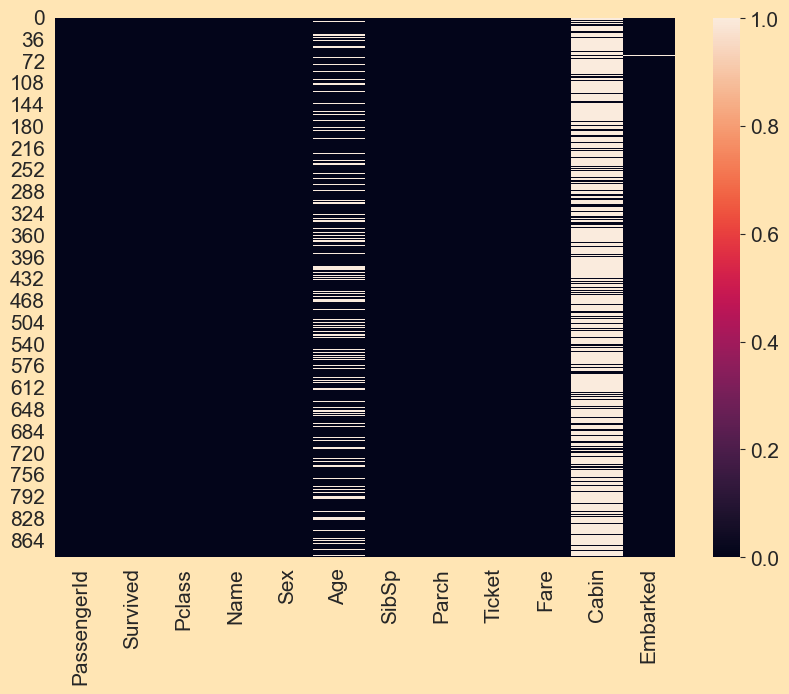

In [10]:
sns.heatmap(df.isnull())

# Observations:
    
1. Thus we can conclude that 177,687 and 2 null values are present in Age and Cabin columns respectively

# Treating nulls

We can drop cabin,name and ticket columns as they have less importance

In [11]:
df.drop(columns = ['Cabin','Name','Ticket'],inplace = True)

In [12]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [14]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,28.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:>

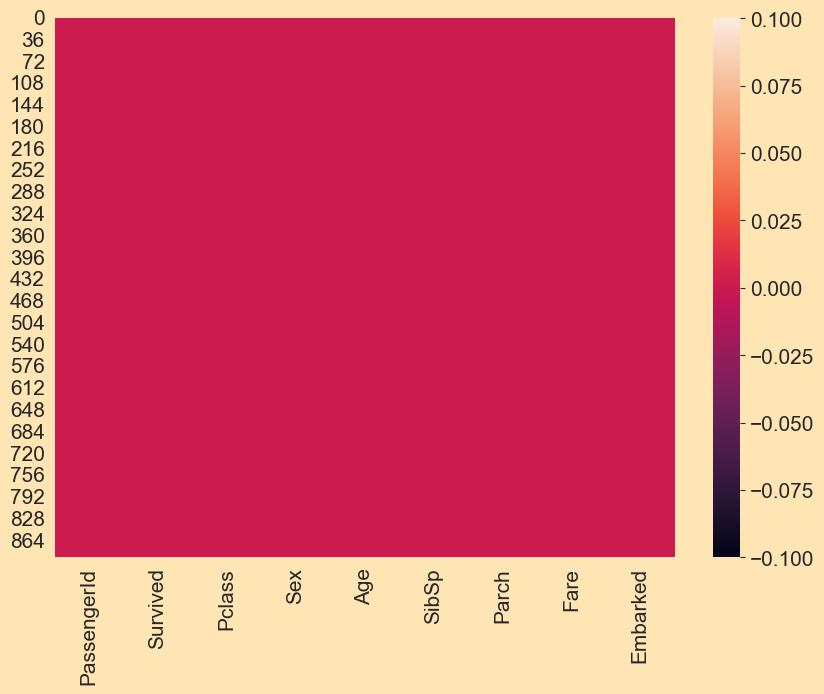

In [16]:
sns.heatmap(df.isnull())

In [17]:
df.set_index('PassengerId',inplace = True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,28.0,1,2,23.4500,S


Null values have been treated successfully

In [18]:
df.duplicated().sum()

116

duplicates present in dataset

In [19]:
df.drop_duplicates(inplace = True)

In [20]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,3,female,39.0,0,5,29.1250,Q
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,28.0,1,2,23.4500,S


In [21]:
df.reset_index(inplace = True)

In [22]:
df.set_index('PassengerId',inplace = True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,3,female,39.0,0,5,29.1250,Q
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,28.0,1,2,23.4500,S


In [23]:
df.duplicated().sum()

0

In [24]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

# Checking value count of each column

In [25]:
#checking value count of each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

0    455
1    320
Name: Survived, dtype: int64


3    401
1    210
2    164
Name: Pclass, dtype: int64


male      483
female    292
Name: Sex, dtype: int64


28.00    121
24.00     29
18.00     25
22.00     24
19.00     23
        ... 
36.50      1
0.92       1
23.50      1
55.50      1
74.00      1
Name: Age, Length: 88, dtype: int64


0    508
1    201
2     27
4     18
3     14
5      5
8      2
Name: SibSp, dtype: int64


0    571
1    114
2     75
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


13.0000    31
26.0000    30
8.0500     25
10.5000    23
7.7500     20
           ..
28.5000     1
6.2375      1
14.0000     1
9.4750      1
10.5167     1
Name: Fare, Length: 248, dtype: int64


S    562
C    155
Q     58
Name: Embarked, dtype: int64




# Descriptive Analysis


In [26]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,0.412903,2.246452,29.581187,0.529032,0.420645,34.878403
std,0.492674,0.853574,13.766359,0.990326,0.840565,52.408474
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.900000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,34.197900
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Observations:
    
Survival Rate: The mean of the ‘Survived’ column is approximately 0.41. This suggests that about 41% of the passengers in this dataset survived.

Passenger Class: The mean of the ‘Pclass’ column is approximately 2.25. This indicates that the average passenger class is between 2nd and 3rd class.

Age: The ‘Age’ column has a mean of approximately 29.58 years, a minimum of 0.42 years (about 5 months), and a maximum of 80 years. This suggests a wide range of ages among the passengers, from infants to the elderly. The 25%, 50%, and 75% percentiles suggest that 50% of the passengers were between 21 and 36 years old.

Siblings/Spouses & Parents/Children: The ‘SibSp’ and ‘Parch’ columns have means of approximately 0.53 and 0.42, respectively. This suggests that passengers typically had less than one sibling, spouse, parent, or child aboard.

Fare: The ‘Fare’ column has a mean of approximately 34.88, a minimum of 0, and a maximum of 512.33. This suggests a wide range of ticket prices, with some passengers possibly traveling for free and others paying high fares. The 25%, 50%, and 75% percentiles suggest that 50% of the fares were between 8.05 and 34.20.

Survived: The mean (0.41) is less than the median (0.50), suggesting a negative skew.

Pclass: The mean (2.25) is less than the median (3.00), suggesting a negative skew.

Age: The mean (29.58) is slightly greater than the median (28.00), suggesting a slight positive skew.

SibSp: The mean (0.53) is greater than the median (0.00), suggesting a positive skew.

Parch: The mean (0.42) is greater than the median (0.00), suggesting a positive skew.

Fare: The mean (34.88) is greater than the median (15.90), suggesting a positive skew.

# Graphical Analysis

In [27]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

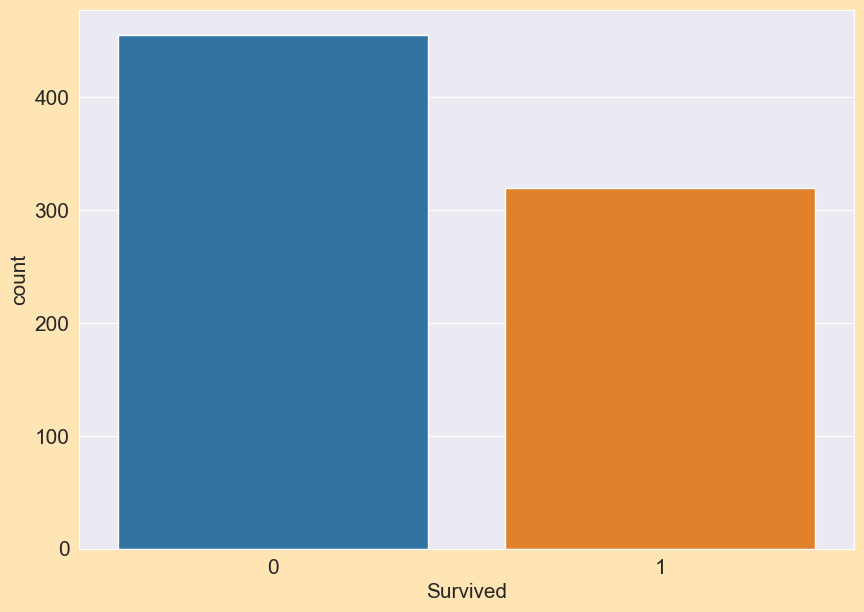

0    455
1    320
Name: Survived, dtype: int64


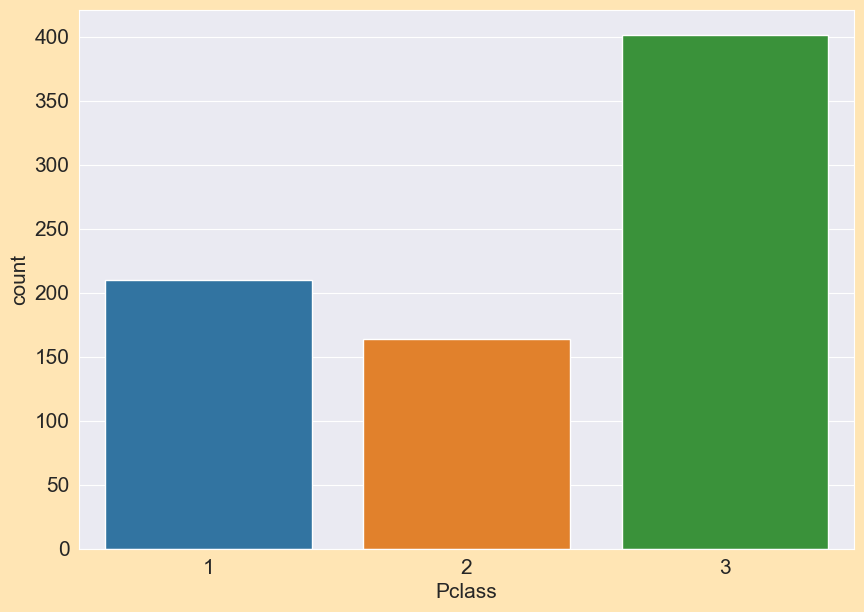

3    401
1    210
2    164
Name: Pclass, dtype: int64


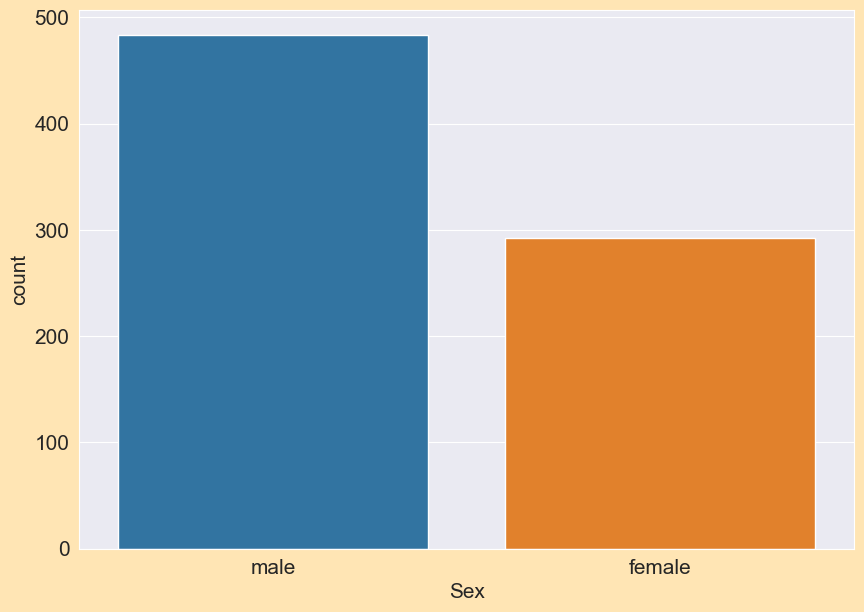

male      483
female    292
Name: Sex, dtype: int64


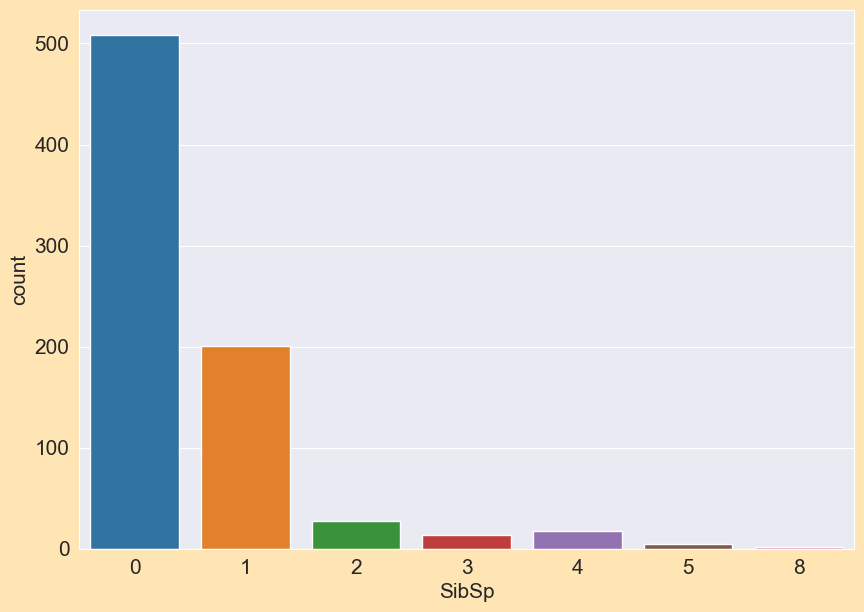

0    508
1    201
2     27
4     18
3     14
5      5
8      2
Name: SibSp, dtype: int64


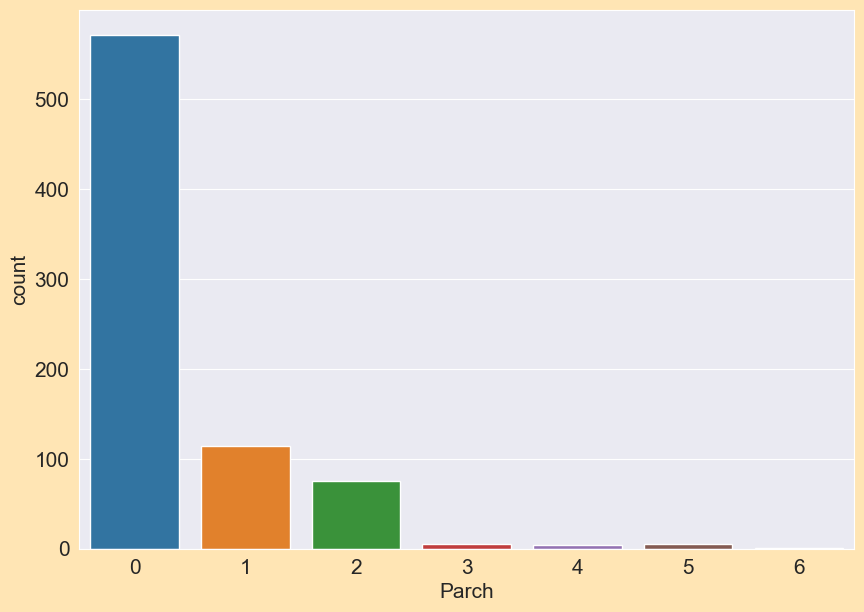

0    571
1    114
2     75
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


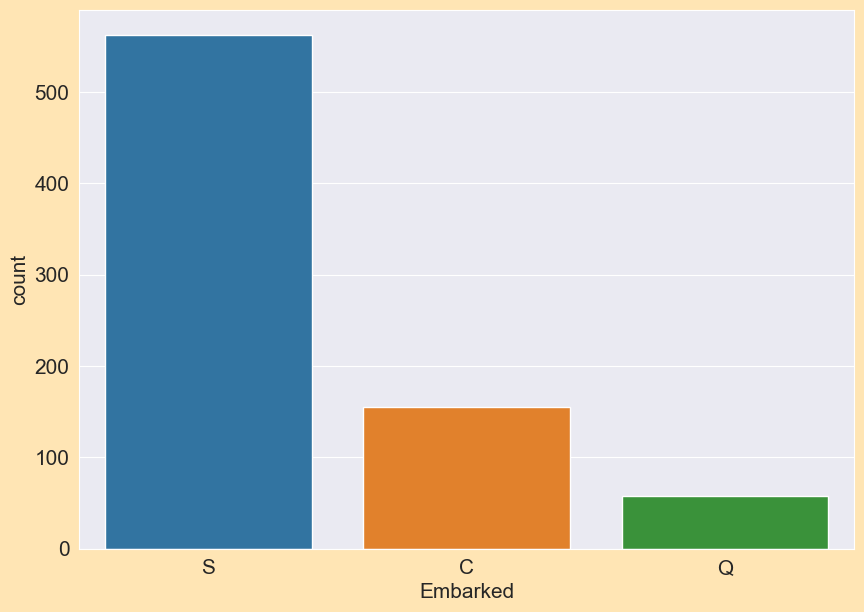

S    562
C    155
Q     58
Name: Embarked, dtype: int64


In [28]:
columns = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch','Embarked']

for i in columns:
    sns.countplot(x=i, data=df)
    plt.show()
    print(df[i].value_counts())

# Observations:
    
1. The count of number of people who survived is less than number of people who didn't

2. The count of passengers who had class 3 ticket is more.

3. Number of male passengers is more than female passengers

4. People who travlled alone with no siblings/spouse and parents and children is more.

5. People who embarked from Southampton are more.

# Survival Count based on Gender

In [29]:
gender_survival = df.groupby('Sex')['Survived'].sum().sort_values(ascending = False)
gender_survival

Sex
female    216
male      104
Name: Survived, dtype: int64

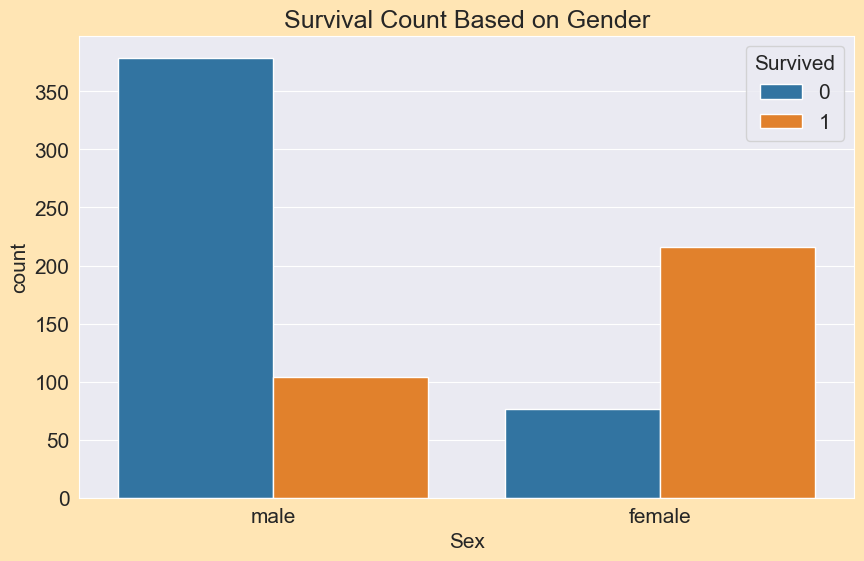

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count Based on Gender')
plt.show()

As we can see the number of females who survived is more than the number of males.

Survival rate for females is 74% and for males is 21%

# Survival Count based on Passenger Class

In [31]:
p_class = df.groupby('Pclass')['Survived'].sum().sort_values(ascending = False)
p_class

Pclass
1    133
3    104
2     83
Name: Survived, dtype: int64

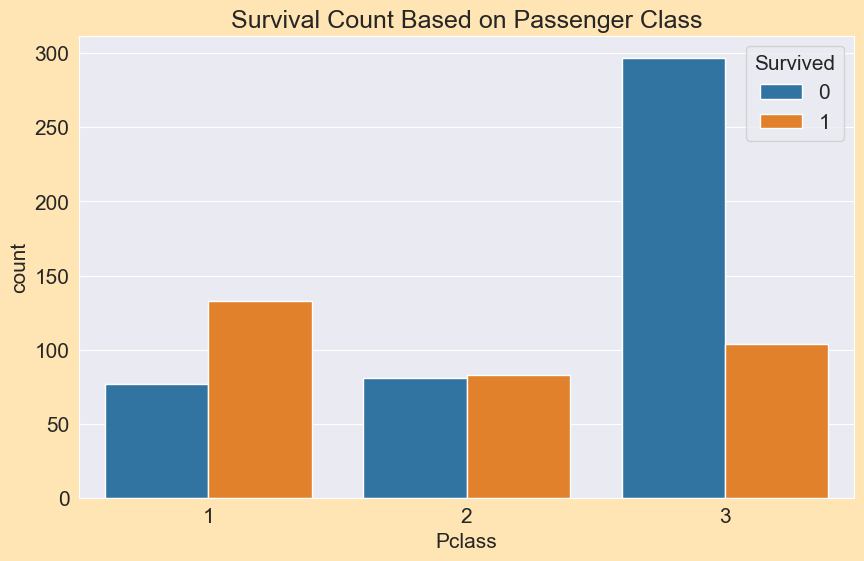

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count Based on Passenger Class')
plt.show()

1. Out of 210 1st class passengers 133 survived and the survival rate of 1st class passengers is 63%

2. The survival rate for 2nd class passengers is 51%

3. The survival rate for 3rd class passengers is 26%



# Survival Count based on Gender and Passenger Class

In [33]:
df_grouped = df.groupby(['Sex', 'Pclass', 'Survived']).size()
print(df_grouped)

Sex     Pclass  Survived
female  1       0             3
                1            90
        2       0             6
                1            66
        3       0            67
                1            60
male    1       0            74
                1            43
        2       0            75
                1            17
        3       0           230
                1            44
dtype: int64


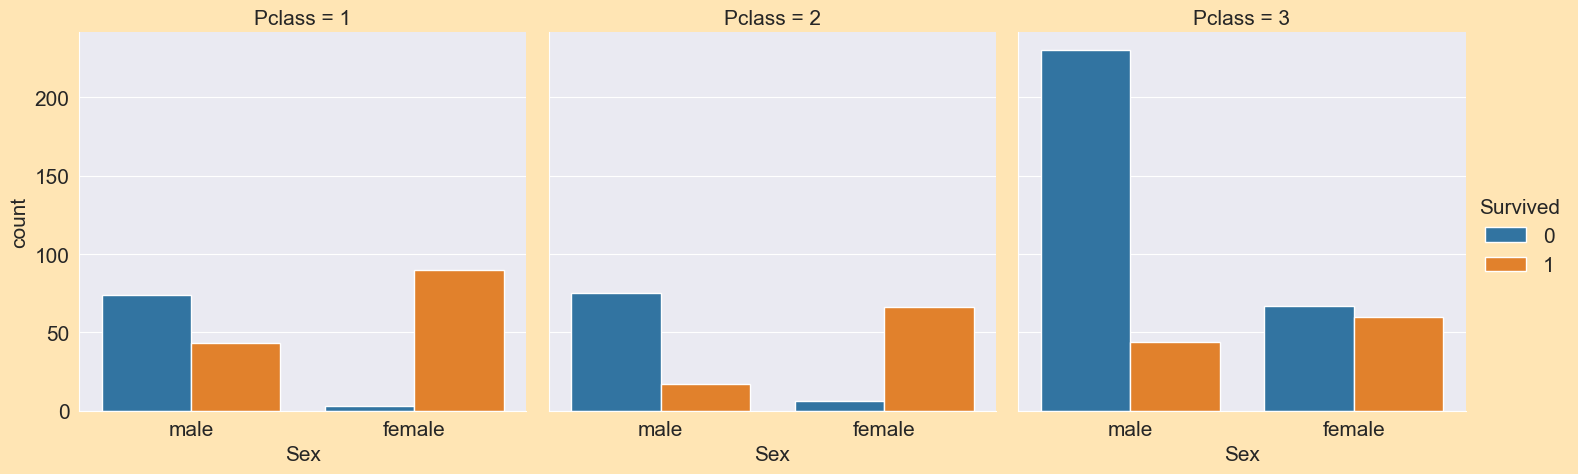

In [34]:
sns.catplot(x='Sex', hue='Survived', col='Pclass', data=df, kind='count')
plt.show()

As we can see that number of female passengers in the 1st and 2nd class is more as compared to male passengers in all the class.

# Survival Count based on Gender and Siblings/Spouses

In [35]:
sibsp = df.groupby('SibSp')['Survived'].sum().sort_values(ascending = False)
sibsp

SibSp
0    194
1    107
2     12
3      4
4      3
5      0
8      0
Name: Survived, dtype: int64

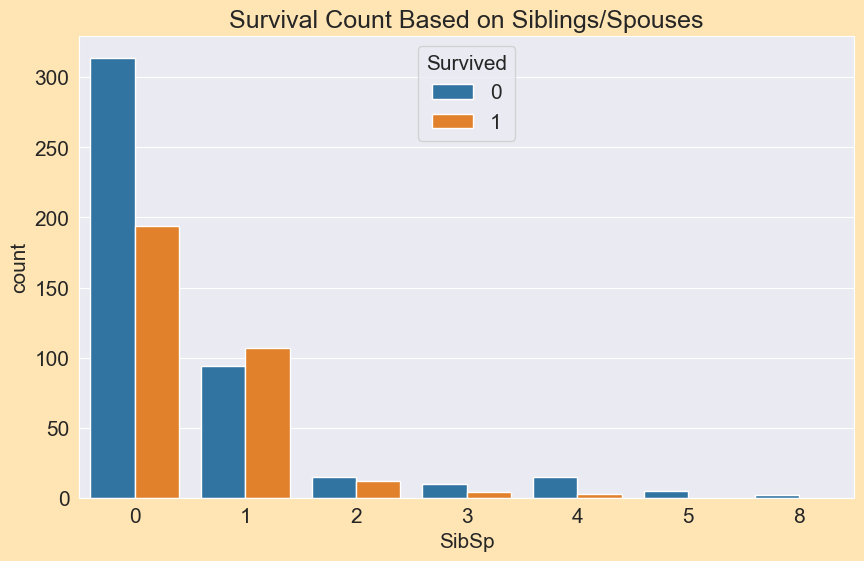

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(x='SibSp', hue='Survived', data=df)
plt.title('Survival Count Based on Siblings/Spouses')
plt.show()

1. Passengers who travelled alone have a survival rate of 38% 

2. Passenger who travelled with 1 sibling or spouse is 53% 

# Survival Count based on Gender and Parents/Childrens

In [37]:
parch = df.groupby('Parch')['Survived'].sum().sort_values(ascending = False)
parch

Parch
0    213
1     63
2     40
3      3
5      1
4      0
6      0
Name: Survived, dtype: int64

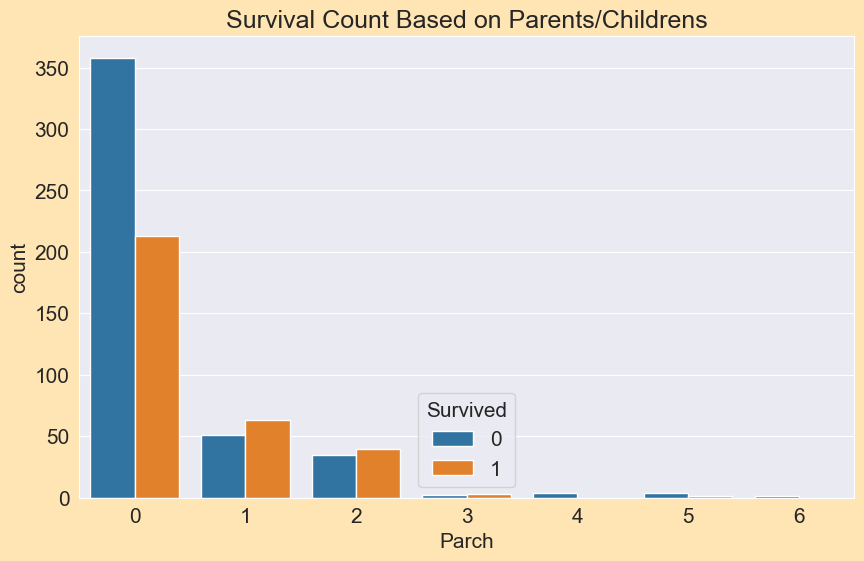

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(x='Parch', hue='Survived', data=df)
plt.title('Survival Count Based on Parents/Childrens')
plt.show()

1. Passengers who travelled alone have a survival rate of 37% 

2. Passenger who travelled with 1 parent or a child is 55% 

# Survival Count based on Port of Embarkation

In [39]:
embk = df.groupby('Embarked')['Survived'].sum().sort_values(ascending = False)
embk

Embarked
S    210
C     90
Q     20
Name: Survived, dtype: int64

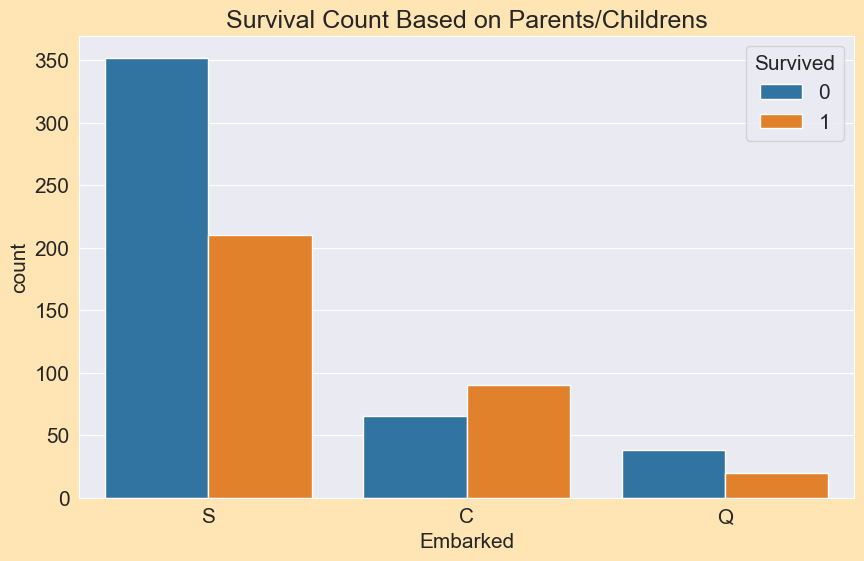

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Count Based on Parents/Childrens')
plt.show()

1. The survival rate for people who embarked from Southampton is 37.3%

2. The survival rate for people who embarked from Cherbourg is 58%

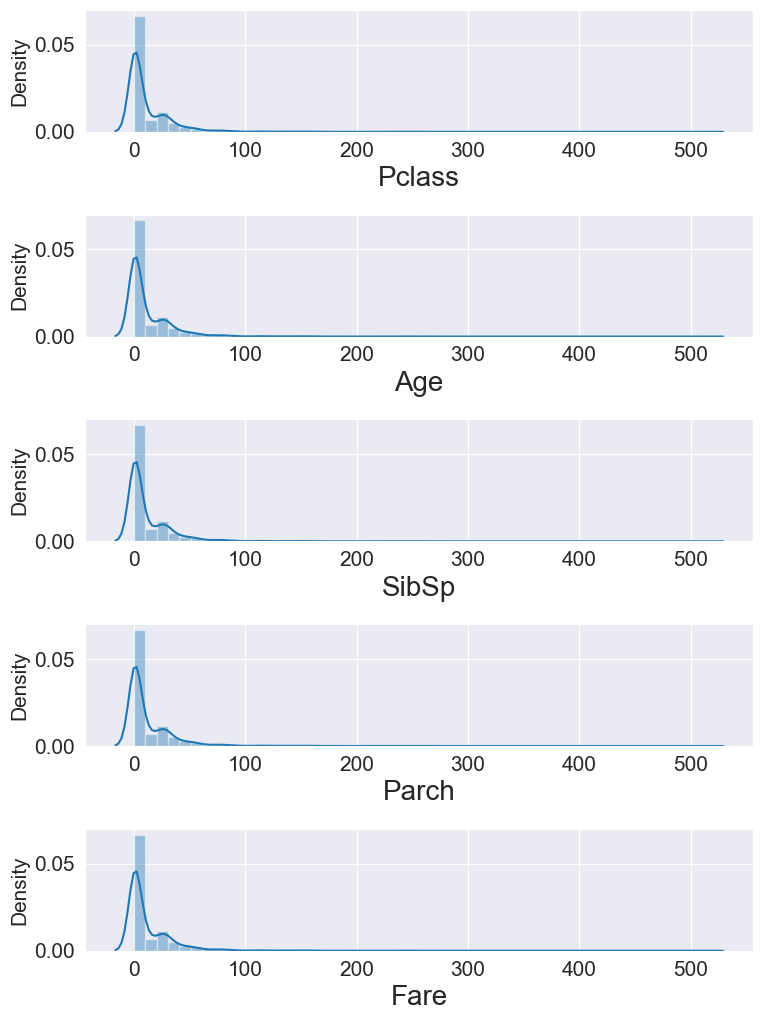

In [41]:
plt.figure(figsize = (8,16), facecolor = 'white')
plotnumber = 1 # assigning variable
col = [ 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
for column in col:
    if plotnumber<= 8:
        ax = plt.subplot(8,1,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1

plt.tight_layout()

Skewness is present in the dataset

In [42]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.331388,-0.078114,-0.037841,0.069864,0.247159
Pclass,-0.331388,1.000000,-0.342745,0.087050,0.038998,-0.554649
Age,-0.078114,-0.342745,1.000000,-0.279316,-0.182697,0.092503
SibSp,-0.037841,0.087050,-0.279316,1.000000,0.379535,0.133807
Parch,0.069864,0.038998,-0.182697,0.379535,1.000000,0.190823
Fare,0.247159,-0.554649,0.092503,0.133807,0.190823,1.000000


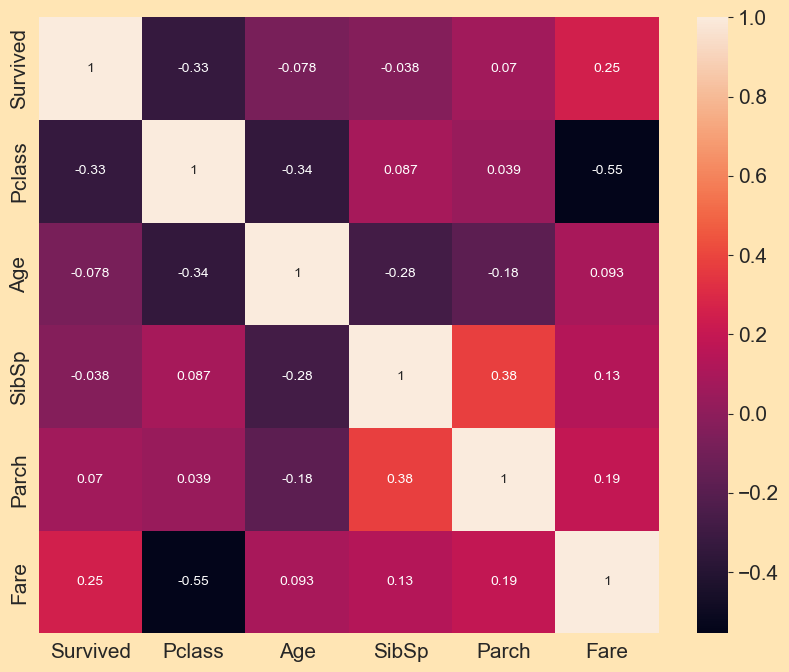

In [43]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(),annot = True, annot_kws = {'size':10})
plt.show()

# Observations :
    
1. Survived and Pclass: The correlation coefficient is -0.331388, indicating a moderate negative correlation. This suggests that the passenger class (Pclass) is inversely related to survival, i.e., passengers in higher classes (lower Pclass values) were more likely to survive.

2. Survived and Fare: The correlation coefficient is 0.247159, indicating a weak positive correlation. This suggests that passengers who paid higher fares were slightly more likely to survive.

3. Pclass and Fare: The correlation coefficient is -0.554649, indicating a moderate negative correlation. This suggests that higher classes (lower Pclass values) correspond to higher fares.

4. SibSp and Parch: The correlation coefficient is 0.379535, indicating a moderate positive correlation. This suggests that passengers with more siblings or spouses on board were likely to also have more parents or children on board.

# Outlier Detection

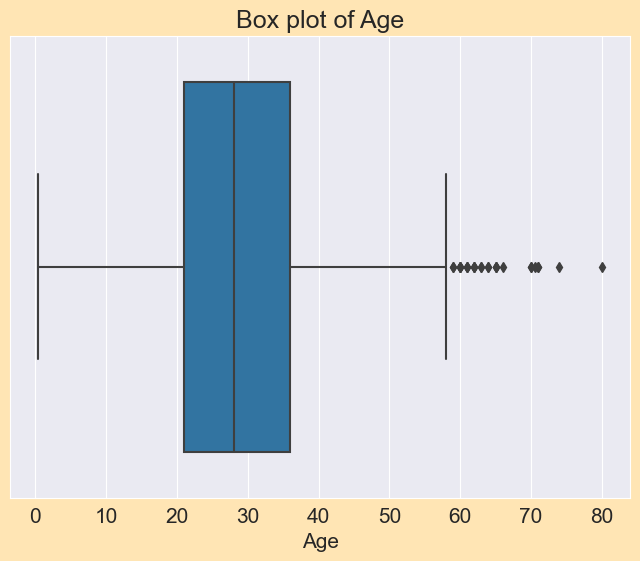

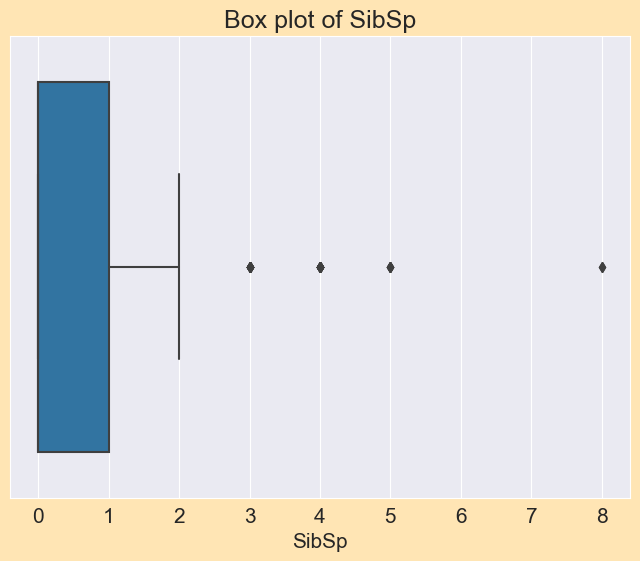

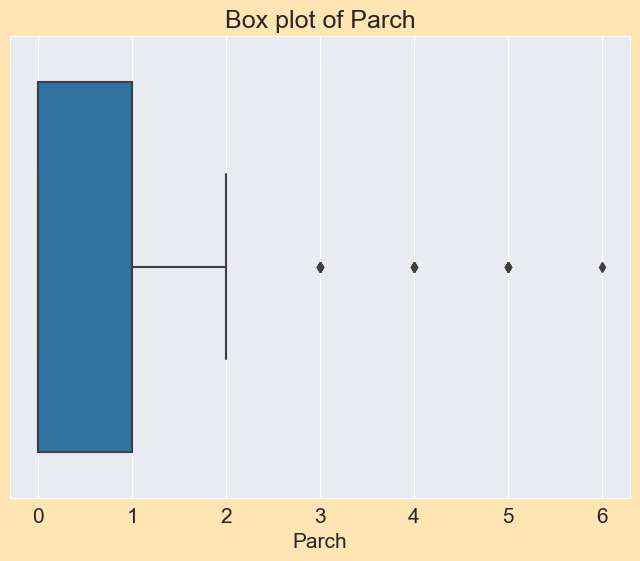

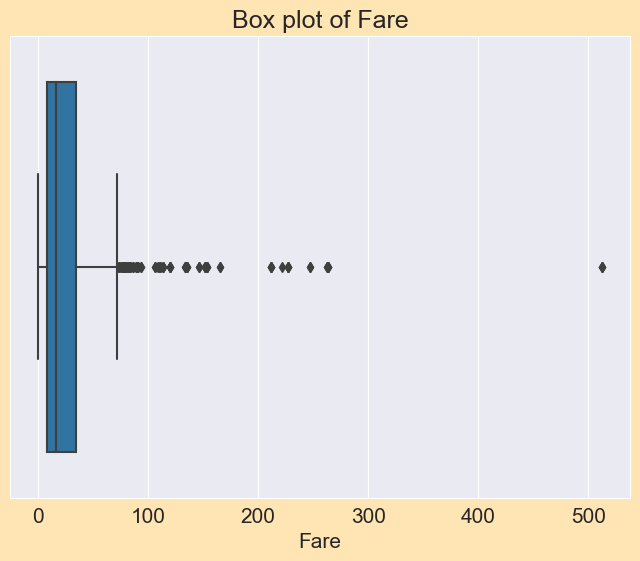

In [44]:
columns = ['Age', 'SibSp', 'Parch', 'Fare']

for column in columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

Outliers are present in the above columns

# Treating outliers

In [45]:
#evaluating zscore for outlier detection
from scipy.stats import zscore
z = np.abs(zscore(df[columns]))
z

,Age,SibSp,Parch,Fare
PassengerId,,,,
1,0.551060,0.475876,0.500754,0.527515
2,0.611945,0.475876,0.500754,0.695086
3,0.260308,0.534545,0.500754,0.514627
4,0.393881,0.475876,0.500754,0.347909
5,0.393881,0.534545,0.500754,0.512240
...,...,...,...,...
886,0.684632,0.534545,5.451465,0.109851
888,0.769123,0.534545,0.500754,0.093144
889,0.114933,0.475876,1.880133,0.218205


In [46]:
#threshold >3
np.where(z>3)

(array([ 13,  16,  25,  27,  49,  57,  66,  69,  82,  83,  90, 110, 111,
        149, 154, 157, 161, 169, 171, 217, 241, 243, 248, 259, 279, 289,
        315, 329, 344, 347, 352, 394, 395, 395, 431, 440, 467, 480, 481,
        495, 502, 539, 556, 562, 594, 595, 599, 602, 605, 614, 629, 643,
        646, 647, 650, 678, 682, 690, 712, 722, 742, 743, 750, 770],
       dtype=int64),
 array([2, 1, 2, 3, 1, 1, 1, 1, 2, 3, 0, 3, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1,
        1, 1, 3, 3, 3, 2, 3, 3, 1, 2, 2, 3, 1, 0, 3, 1, 1, 3, 2, 2, 0, 2,
        2, 3, 1, 1, 3, 3, 3, 3, 2, 3, 3, 2, 3, 1, 1, 1, 1, 0, 2, 2],
       dtype=int64))

In [47]:
#making a new dataframe removing outliers
df1 = df[(z<3).all(axis =1)]
df1.shape

(712, 8)

In [48]:
print('Old Data Frame shape', df.shape[0])
print('New Data Frame shape', df1.shape[0])

Old Data Frame shape 775
New Data Frame shape 712


In [49]:
print('Data Loss Percentage = ', ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage =  8.129032258064516


Data loss percentage is below 10% with z score method. Lets check by iqr method also

In [50]:
Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1

# Create a boolean mask for the outliers
df2 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis = 1)]

In [51]:
df2.shape

(601, 8)

In [52]:
print('Data Loss Percentage = ', ((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data Loss Percentage =  22.451612903225808


Data loss percentage is more for iqr method

In [53]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
884,0,2,male,28.0,0,0,10.5000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,28.0,1,2,23.4500,S


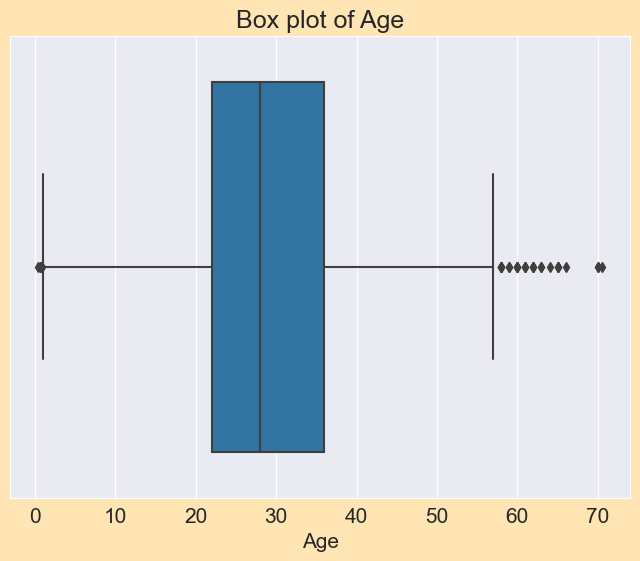

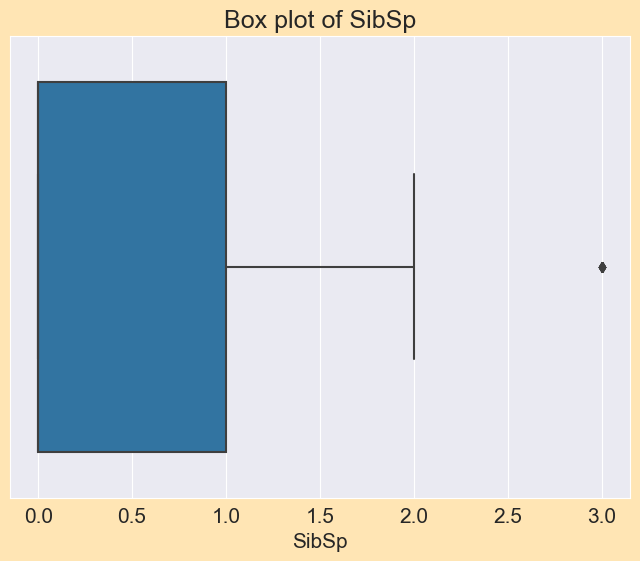

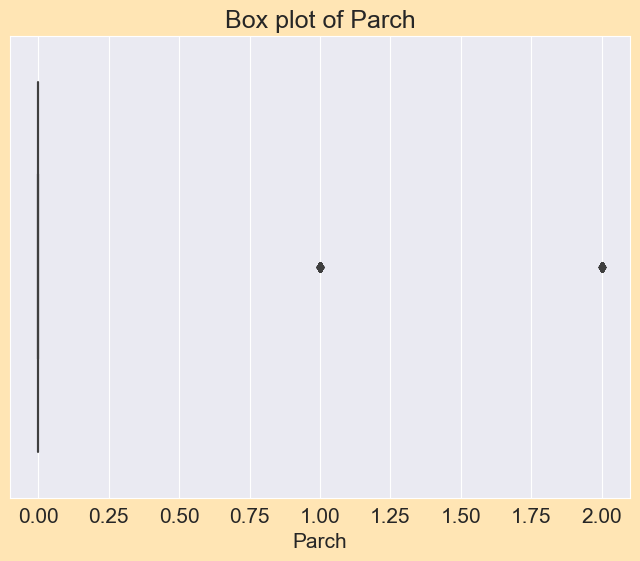

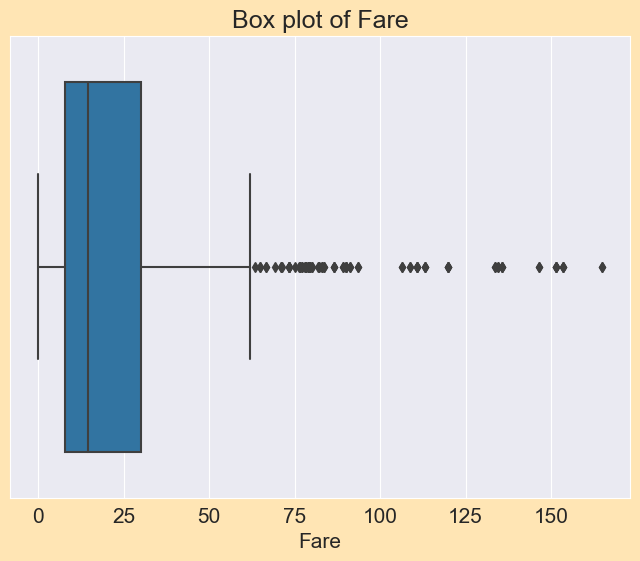

In [54]:
columns = ['Age', 'SibSp', 'Parch', 'Fare']

for column in columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df1[column])
    plt.title(f'Box plot of {column}')
    plt.show()

# Removing Skewness

In [55]:
df1.skew()

Survived    0.330953
Pclass     -0.493459
Age         0.395833
SibSp       1.796478
Parch       1.918377
Fare        2.141550
dtype: float64

# Observations:
    
1. Survived: The skewness is 0.330953, which is close to 0, suggesting that the ‘Survived’ data is approximately symmetric.

2. Pclass: The skewness is -0.493459, which is negative, suggesting that the ‘Pclass’ data is left-skewed (the left tail is longer or fatter than the right tail).

3. Age: The skewness is 0.395833, which is close to 0, suggesting that the ‘Age’ data is approximately symmetric.

4. SibSp: The skewness is 1.796478, which is positive and greater than 1, suggesting that the ‘SibSp’ data is highly right-skewed (the right tail is longer or fatter than the left tail).

5. Parch: The skewness is 1.918377, which is positive and greater than 1, suggesting that the ‘Parch’ data is highly right-skewed.

6. Fare: The skewness is 2.141550, which is positive and greater than 1, suggesting that the ‘Fare’ data is highly right-skewed.

In [56]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [57]:
df1[['Pclass', 'SibSp', 'Parch', 'Fare']] = np.cbrt(df1[['Pclass', 'SibSp', 'Parch', 'Fare']])

In [58]:
df1.skew()

Survived    0.330953
Pclass     -0.646831
Age         0.395833
SibSp       0.863106
Parch       1.452487
Fare        0.744538
dtype: float64

In [59]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,1.442250,male,22.0,1.0,0.000000,1.935438,S
2,1,1.000000,female,38.0,1.0,0.000000,4.146318,C
3,1,1.442250,female,26.0,0.0,0.000000,1.993730,S
4,1,1.000000,female,35.0,1.0,0.000000,3.758647,S
5,0,1.442250,male,35.0,0.0,0.000000,2.004158,S
...,...,...,...,...,...,...,...,...
884,0,1.259921,male,28.0,0.0,0.000000,2.189760,S
888,1,1.000000,female,19.0,0.0,0.000000,3.107233,S
889,0,1.442250,female,28.0,1.0,1.259921,2.862294,S


In [60]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [61]:
df1 = pd.get_dummies(df1,columns = ['Sex'],drop_first= True)

In [62]:
df1

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
PassengerId,,,,,,,,
1,0,1.442250,22.0,1.0,0.000000,1.935438,S,1
2,1,1.000000,38.0,1.0,0.000000,4.146318,C,0
3,1,1.442250,26.0,0.0,0.000000,1.993730,S,0
4,1,1.000000,35.0,1.0,0.000000,3.758647,S,0
5,0,1.442250,35.0,0.0,0.000000,2.004158,S,1
...,...,...,...,...,...,...,...,...
884,0,1.259921,28.0,0.0,0.000000,2.189760,S,1
888,1,1.000000,19.0,0.0,0.000000,3.107233,S,0
889,0,1.442250,28.0,1.0,1.259921,2.862294,S,0


In [64]:
enc = OrdinalEncoder()
df1['Embarked'] = enc.fit_transform(df1[['Embarked']])

In [65]:
df1

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
PassengerId,,,,,,,,
1,0,1.442250,22.0,1.0,0.000000,1.935438,2.0,1
2,1,1.000000,38.0,1.0,0.000000,4.146318,0.0,0
3,1,1.442250,26.0,0.0,0.000000,1.993730,2.0,0
4,1,1.000000,35.0,1.0,0.000000,3.758647,2.0,0
5,0,1.442250,35.0,0.0,0.000000,2.004158,2.0,1
...,...,...,...,...,...,...,...,...
884,0,1.259921,28.0,0.0,0.000000,2.189760,2.0,1
888,1,1.000000,19.0,0.0,0.000000,3.107233,2.0,0
889,0,1.442250,28.0,1.0,1.259921,2.862294,2.0,0


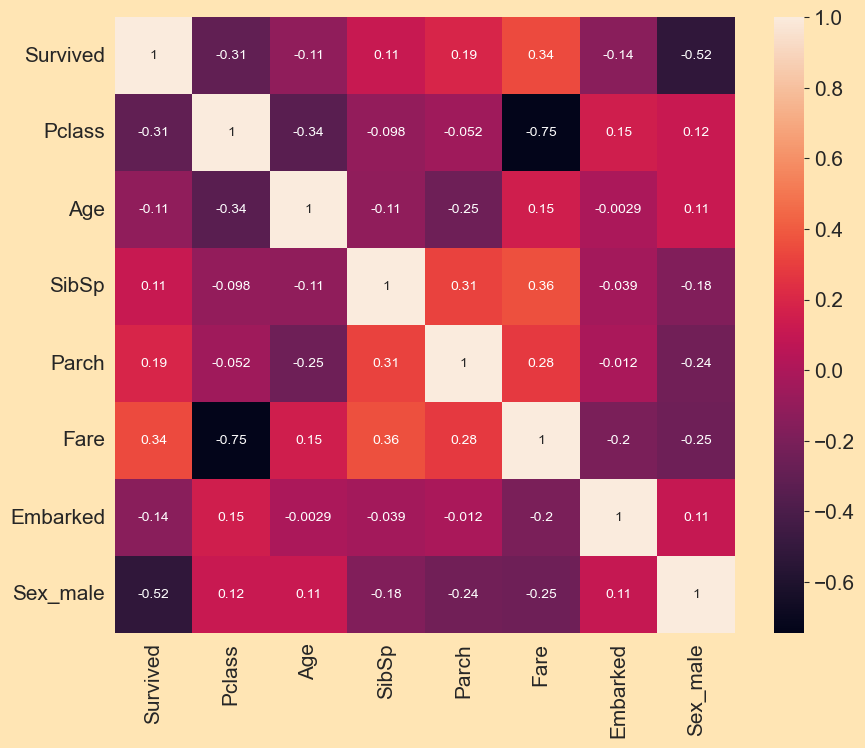

In [66]:
#Checking correlation again

plt.figure(figsize = (10,8))
sns.heatmap(df1.corr(),annot = True, annot_kws = {'size':10})
plt.show()

In [67]:
df1.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
Survived,1.000000,-0.308091,-0.111763,0.112183,0.194110,0.339463,-0.144331,-0.524429
Pclass,-0.308091,1.000000,-0.338878,-0.097633,-0.051850,-0.745008,0.153484,0.117491
Age,-0.111763,-0.338878,1.000000,-0.114545,-0.248417,0.151630,-0.002929,0.114173
SibSp,0.112183,-0.097633,-0.114545,1.000000,0.314950,0.361062,-0.038842,-0.176877
Parch,0.194110,-0.051850,-0.248417,0.314950,1.000000,0.282221,-0.011562,-0.238670
Fare,0.339463,-0.745008,0.151630,0.361062,0.282221,1.000000,-0.202127,-0.248876
Embarked,-0.144331,0.153484,-0.002929,-0.038842,-0.011562,-0.202127,1.000000,0.105225
Sex_male,-0.524429,0.117491,0.114173,-0.176877,-0.238670,-0.248876,0.105225,1.000000


# Feature Scaling

In [68]:
#seperating features and target variables
y = df1['Survived']
X = df1.drop('Survived', axis = 1)

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)
x

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
0,0.853871,-0.600218,1.357204,-0.518929,-0.852721,0.583612,0.760733
1,-1.541651,0.621796,1.357204,-0.518929,1.521682,-1.912073,-1.314522
2,0.853871,-0.294714,-0.673338,-0.518929,-0.790118,0.583612,-1.314522
3,-1.541651,0.392668,1.357204,-0.518929,1.105337,0.583612,-1.314522
4,0.853871,0.392668,-0.673338,-0.518929,-0.778919,0.583612,0.760733
...,...,...,...,...,...,...,...
707,-0.133743,-0.141963,-0.673338,-0.518929,-0.579590,0.583612,0.760733
708,-1.541651,-0.829345,-0.673338,-0.518929,0.405743,0.583612,-1.314522
709,0.853871,-0.141963,1.357204,2.272319,0.142688,0.583612,-1.314522
710,-1.541651,-0.294714,-0.673338,-0.518929,0.405743,-1.912073,0.760733


# VIF

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF Values,Features
0,2.729620,Pclass
1,1.250342,Age
2,1.294690,SibSp
3,1.290237,Parch
4,3.107852,Fare
5,1.052756,Embarked
6,1.123236,Sex_male


Pclass:  The VIF is 2.729620, which is moderately high. This suggests that the ‘Pclass’ feature has some correlation with other features in dataset.

Age, SibSp, Parch, Embarked, Sex_male: The VIFs are all close to 1, suggesting that these features have little to no correlation with other features in dataset.

Fare: The VIF is 3.107852, which is moderately high. This suggests that the ‘Fare’ feature has some correlation with other features in dataset.

There is no severe multicollinearity issue in the dataset

# Modelling

In [75]:
#finding random state

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRs = 0
for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i 
print('Best Accuracy is =', maxAccu,'at random state =', maxRS )

Best Accuracy is = 0.8271028037383178 at random state = 491


In [76]:
#Creating train and test split at random state = 58
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = maxRS)

In [77]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [78]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [79]:
#random Forest classifier
RFR = RandomForestClassifier()
RFR.fit(x_train,y_train)
predRFC = RFR.predict(x_test)
print('accuracy score is = ',accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

accuracy score is =  0.8084112149532711
[[109  20]
 [ 21  64]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       129
           1       0.76      0.75      0.76        85

    accuracy                           0.81       214
   macro avg       0.80      0.80      0.80       214
weighted avg       0.81      0.81      0.81       214



In [80]:
#Logistic Regression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print('accuracy score is = ',accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

accuracy score is =  0.7850467289719626
[[105  24]
 [ 22  63]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       129
           1       0.72      0.74      0.73        85

    accuracy                           0.79       214
   macro avg       0.78      0.78      0.78       214
weighted avg       0.79      0.79      0.79       214



In [81]:
#XGboost

xgb = xgb.XGBClassifier()
xgb.fit(x_train,y_train)
predXGB = xgb.predict(x_test)
print('accuracy score is = ',accuracy_score(y_test,predXGB))
print(confusion_matrix(y_test,predXGB))
print(classification_report(y_test,predXGB))

accuracy score is =  0.7990654205607477
[[107  22]
 [ 21  64]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       129
           1       0.74      0.75      0.75        85

    accuracy                           0.80       214
   macro avg       0.79      0.79      0.79       214
weighted avg       0.80      0.80      0.80       214



In [82]:
#SVM classifier

svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print('accuracy score is = ',accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

accuracy score is =  0.8177570093457944
[[111  18]
 [ 21  64]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       129
           1       0.78      0.75      0.77        85

    accuracy                           0.82       214
   macro avg       0.81      0.81      0.81       214
weighted avg       0.82      0.82      0.82       214



In [83]:
#Gradient Boosting Classifier

gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb = gb.predict(x_test)
print('accuracy score is = ',accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

accuracy score is =  0.822429906542056
[[112  17]
 [ 21  64]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       129
           1       0.79      0.75      0.77        85

    accuracy                           0.82       214
   macro avg       0.82      0.81      0.81       214
weighted avg       0.82      0.82      0.82       214



In [84]:
#AdaBoost Classifier


abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
predabc = abc.predict(x_test)
print('accuracy score is = ',accuracy_score(y_test,predabc))
print(confusion_matrix(y_test,predabc))
print(classification_report(y_test,predabc))

accuracy score is =  0.7990654205607477
[[106  23]
 [ 20  65]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       129
           1       0.74      0.76      0.75        85

    accuracy                           0.80       214
   macro avg       0.79      0.79      0.79       214
weighted avg       0.80      0.80      0.80       214



In [85]:
#Bagging Classifier


bc = BaggingClassifier()
bc.fit(x_train,y_train)
predbc = bc.predict(x_test)
print('accuracy score is = ',accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predabc))

accuracy score is =  0.8130841121495327
[[110  19]
 [ 21  64]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       129
           1       0.74      0.76      0.75        85

    accuracy                           0.80       214
   macro avg       0.79      0.79      0.79       214
weighted avg       0.80      0.80      0.80       214



In [86]:
#ExtraTrees Classifier


et = ExtraTreesClassifier()
et.fit(x_train,y_train)
predet = et.predict(x_test)
print('accuracy score is = ',accuracy_score(y_test,predet))
print(confusion_matrix(y_test,predet))
print(classification_report(y_test,predet))

accuracy score is =  0.8177570093457944
[[107  22]
 [ 17  68]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       129
           1       0.76      0.80      0.78        85

    accuracy                           0.82       214
   macro avg       0.81      0.81      0.81       214
weighted avg       0.82      0.82      0.82       214



# Cross Validation

In [88]:
#random forest
score = cross_val_score(RFR,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and  cross validation score is =' ,accuracy_score(y_test,predRFC)- score.mean())

[0.72727273 0.76223776 0.80985915 0.74647887 0.78873239]
0.7669161824091402
Difference between Accuracy score and  cross validation score is = 0.041495032544130894


In [90]:
#logistic regression
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and  cross validation score is =' ,accuracy_score(y_test,predLR)- score.mean())

[0.76923077 0.76923077 0.73239437 0.76056338 0.79577465]
0.7654387865655472
Difference between Accuracy score and  cross validation score is = 0.01960794240641539


In [92]:
#XGboost
score = cross_val_score(xgb,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and  cross validation score is =' ,accuracy_score(y_test,predXGB)- score.mean())

[0.71328671 0.7972028  0.83098592 0.75352113 0.78873239]
0.7767457894218457
Difference between Accuracy score and  cross validation score is = 0.022319631138902007


In [93]:
#Gradient Boosting Classifier
score = cross_val_score(gb,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and  cross validation score is =' ,accuracy_score(y_test,predgb)- score.mean())

[0.74125874 0.7972028  0.8028169  0.78169014 0.78873239]
0.7823401950162514
Difference between Accuracy score and  cross validation score is = 0.04008971152580465


In [94]:
#SVM
score = cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and  cross validation score is =' ,accuracy_score(y_test,predsvc)- score.mean())

[0.78321678 0.78321678 0.78169014 0.78169014 0.86619718]
0.7992022062444597
Difference between Accuracy score and  cross validation score is = 0.018554803101334727


In [95]:
#Ada Boosting
score = cross_val_score(abc,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and  cross validation score is =' ,accuracy_score(y_test,predabc)- score.mean())

[0.74825175 0.7972028  0.77464789 0.76056338 0.80985915]
0.7781049935979513
Difference between Accuracy score and  cross validation score is = 0.02096042696279643


In [96]:
#Bagging
score = cross_val_score(bc,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and  cross validation score is =' ,accuracy_score(y_test,predbc)- score.mean())

[0.6993007  0.76223776 0.78169014 0.73943662 0.8028169 ]
0.7570964247020585
Difference between Accuracy score and  cross validation score is = 0.05598768744747418


In [97]:
#Extra Trees
score = cross_val_score(et,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and  cross validation score is =' ,accuracy_score(y_test,predet)- score.mean())

[0.72727273 0.72027972 0.80985915 0.74647887 0.74647887]
0.7500738697921796
Difference between Accuracy score and  cross validation score is = 0.06768313955361482


SVM Classifier is our best model as difference between accuracy score and cross validation score is least

# HyperParameter Tuning

In [117]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['linear','rbf']}

In [118]:
from sklearn import svm
GCV = GridSearchCV(svm.SVC(),parameters,cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear', 'rbf']})

In [120]:
final_model = GCV.best_estimator_
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

79.90654205607477


# Plotting ROC, AUC curve

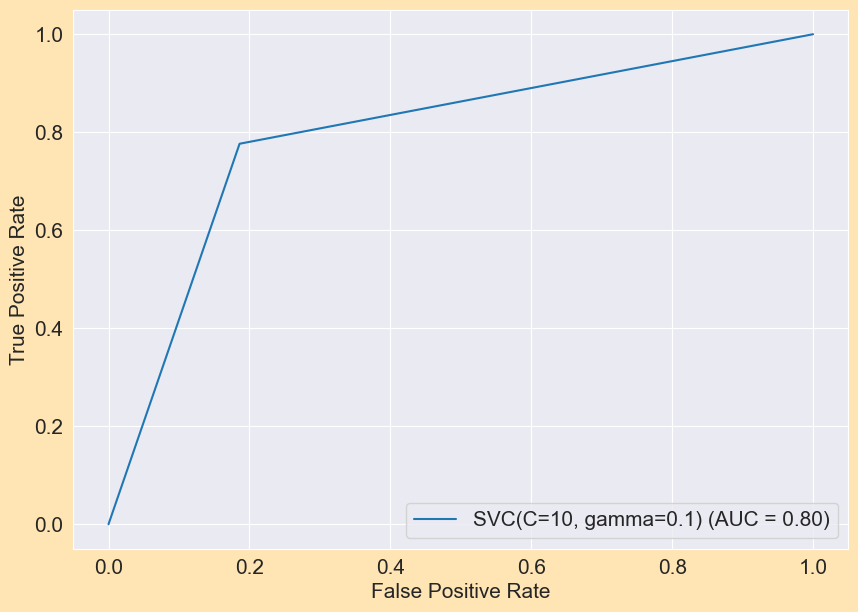

In [121]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr,tpr=tpr,roc_auc = roc_auc,estimator_name = final_model)
display.plot()

# In this case, the AUC is 0.8, which is considered good. This means the classifier does a good job distinguishing between the positive and negative classes.

In [122]:
#Saving the model
import pickle
filename = 'TitanicTrain.pkl'
pickle.dump(final_model,open(filename,'wb'))

In [123]:
import pickle
loaded_model = pickle.load(open('TitanicTrain.pkl','rb'))
prediction = loaded_model.predict(x_test)
prediction

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [124]:
a = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] = prediction
df['Original'] = a
df

,Predicted,Original
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
209,1,1
210,0,0
211,0,0
212,1,1
